# Linear Regression on Python

Datasets: from kaggles https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility?select=heart.csv

# Simple Linear Regression

## 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Import excel data file into pandas data frame

Data Info:  

Attribute Information  
1) age  
2) sex  
3) cp = chest pain type (4 values)  
4) trestbps = resting blood pressure  
5) chol = serum cholestoral in mg/dl  
6) fbs = fasting blood sugar > 120 mg/dl  
7) restecg = resting electrocardiographic results (values 0,1,2)  
8) thalach = maximum heart rate achieved  
9) exang = exercise induced angina  
10) oldpeak = ST depression induced by exercise relative to rest  
11) slope = the slope of the peak exercise ST segment  
12) ca = number of major vessels (0-3) colored by flourosopy  
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect  
14) target: 0= less chance of heart attack 1= more chance of heart attack  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/health2.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to check dataframe, use display()
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Data Cleaning

In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 4. Feature Selection
Now that the data is good to go, we are ready to move on to the next step of the process. As there are 14 features in the dataset, we do not want to use all of these features for training our model, because not all of them are relevant. Instead, we want to choose those features that directly influence the result (that is, prices of houses) to train the model. For this, we can use the corr() function. The corr() function computes the pairwise correlation of columns:

In [ ]:
# This Time we choose variables. 

In [ ]:
# #---get the top 3 features that has the highest correlation---
#select the independent variables you chose inside of ' ' to see which variables has a strong correlation with age.  

print(df.corr().abs().nlargest(3, 'age').index) # we put independent

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'age').values[:,13]) # we put independent

Index(['age', 'thalach', 'trestbps'], dtype='object')
[0.22543872 0.42174093 0.14493113]


## 5. Create the simple linear regression graph.
hint: figure3.1 - Least squares fit

sns.regplot(x-values, y-values, order= order of variable, ci=confidence interval, scatter_kws={'color':'r',size':9})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


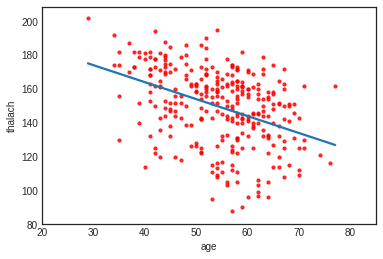

In [ ]:
sns.regplot(df['age'], df['thalach'], order=1, ci=None, scatter_kws={'color':'r', 's':10})
plt.xlim(20,85)
plt.ylim(ymin=80);

## 6. Find Regression Coefficient and Intercept
hint: figure 3.2## Figure 3.2- Regression coefficients - RSS

Note that the text in the book describes the coefficients based on uncentered data, whereas the plot shows the model based on centered data. The latter is visually more appealing for explaining the concept of a minimum RSS. I think that, in order not to confuse the reader, the values on the axis of the B0 coefficients have been changed to correspond with the text. The axes on the plots below are unaltered.

This model is looking for intercept and coefficients

y-value will be a target value for prediction variable.  
In this notebook, set "age" as a prediction variable.  

In [ ]:
# Regression coefficients (Ordinary Squares)
regr = skl_lm.LinearRegression()

X = scale(df['thalach'], with_mean=True, with_std=False).reshape(-1,1)
Y = df['age']

regr.fit(X,Y)
print("This is intercept:", regr.intercept_)
print("This is coefficient:", regr.coef_)

This is intercept: 54.366336633663366
This is coefficient: [-0.15801751]


In [ ]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-10, regr.intercept_+10, 50)
B1 = np.linspace(regr.coef_-0.8, regr.coef_+0.8, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((Y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - Y.values.reshape(-1,1))**2)/1000
min_rss

20.954083566664544

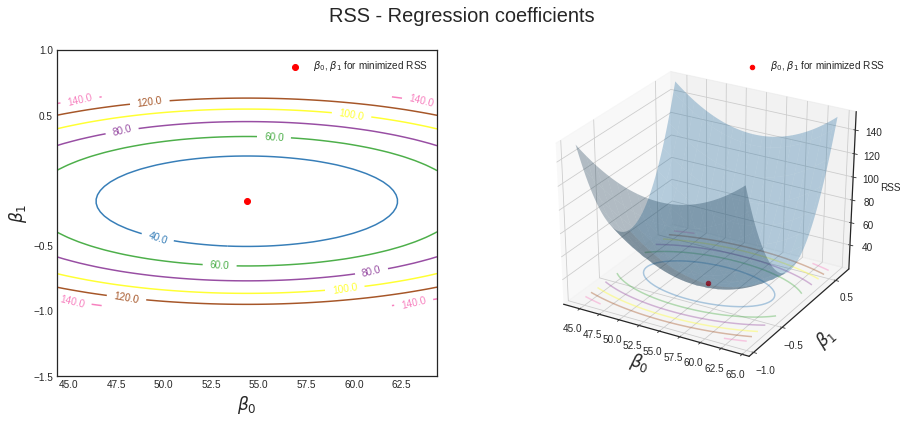

In [ ]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1,)# levels=[21, 21.2, 21.4, 21.6, 21.8])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, ) #levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
#ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([-1.5, -1, -.5, .5, 1])
    ax.legend()

model = sm.OLS(y, X)

## 7. Create Confidence Interval: Statsmodels
hint: Confidence interval on page 67 & Table 3.1 & 3.2 - Statsmodels from pdf 

In [ ]:
est = smf.ols('age ~ thalach', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,78.0132,3.173,24.585,0.000,71.769,84.258
thalach,-0.1580,0.021,-7.539,0.000,-0.199,-0.117


In [ ]:
# RSS with regression coefficients
((df['thalach'] - (est.params[0] + est.params[1]*df['age']))**2).sum()/1000

2101.2535093274987

## Table3.1&3.2- sklearn

((y-value - (est.params[0] + est.params[1]*X-value)**2).sum()/1000

In [ ]:
regr = skl_lm.LinearRegression()

X = df['age'].values.reshape(-1,1)
y = df['thalach']

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

204.2892095372552
[-1.00507682]


In [ ]:
age_pred = regr.predict(X)
r2_score(Y, age_pred)

0.1588197351637718

## Multiple Linear Regression

## 8. Create statsmodels
hint: Table 3.3

In [ ]:
est = smf.ols('age ~ trestbps', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,35.3255,3.806,9.283,0.000,27.837,42.814
trestbps,0.1447,0.029,5.048,0.000,0.088,0.201


In [ ]:
est = smf.ols('age ~ chol', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,45.1457,2.483,18.183,0.000,40.260,50.032
chol,0.0374,0.010,3.795,0.000,0.018,0.057


### Table 3.4 &3.6 - Statsmodels

In [ ]:
#est = smf.ols('age ~ thalach + trestbps + chol', df).fit()
#est.summary().tables[1]

### Table 3.5 - Correlation Matrix

In [ ]:
#df.corr()

## 9. Create multiple linear regression on 3D plot.
hint: figure 3.5 -multiple lienear regression

In [ ]:
regr = skl_lm.LinearRegression()

X = df[['thalach', 'trestbps']].values
y = df['age']

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[-0.15317906  0.13531934]
59.47786243603966


In [ ]:
# What are the min/max values of thalach & trestbps?
# Use these values to set up the grid for plotting.
df[['thalach', 'trestbps']].describe()

,thalach,trestbps
count,303.000000,303.000000
mean,149.646865,131.623762
std,22.905161,17.538143
min,71.000000,94.000000
25%,133.500000,120.000000
50%,153.000000,130.000000
75%,166.000000,140.000000
max,202.000000,200.000000


In [ ]:
# Create a coordinate grid
thalach = np.arange(0,50)
trestbps = np.arange(0,300)

B1, B2 = np.meshgrid(df['thalach'], df['trestbps'], indexing='xy')
Z = np.zeros((df['trestbps'].size, df['thalach'].size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

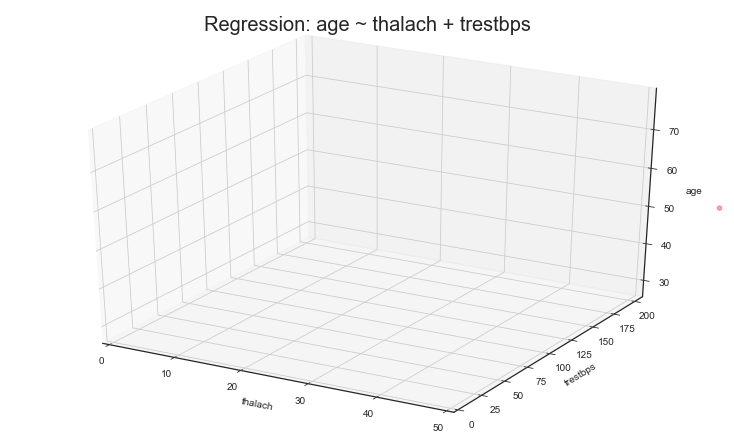

In [ ]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: age ~ thalach + trestbps', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(df['thalach'], df['trestbps'], df['age'], c='r')

ax.set_xlabel('thalach')
ax.set_xlim(0,50)
ax.set_ylabel('trestbps')
ax.set_ylim(bottom=0)
ax.set_zlabel('age');

### Figure 3.6

In [ ]:
#sns.pairplot(df[['age','thalach','trestbps','chol','oldpeak']]);

## Interaction Variables

In [ ]:
#est = smf.ols('age ~ thalach + trestbps + thalach*trestbps', df).fit()
#est.summary().tables[1]

### Figure 3.7 - Interaction between qualitative and quantative variables.

In [ ]:
#est1 = smf.ols('age ~ thalach + trestbps', df).fit()
#regr1 = est1.params
#est2 = smf.ols('age ~ thalach + thalach*trestbps', df).fit()
#regr2 = est2.params

#print('Regression 1 - without interaction term')
#print(regr1)
#print('\nRegression 2 - with interaction term')
#print(regr2)